#### Binary Classification
* Performing a binary classification on scikitlearn cancer data set using VECTOR MACHINE SUPPORT objects
* Visualing confusion matrix and classification report
* Considerations on the best ways to evaluate models

In [23]:
# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries and modules for Machine Learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix



In [24]:
# Import the dataset Wisconsin breast cancer dataset from skelarn.
from sklearn.datasets import load_breast_cancer
cancer =  load_breast_cancer()
print(type(cancer))
print(cancer.feature_names)
print(cancer.target_names)

<class 'sklearn.utils._bunch.Bunch'>
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [25]:
# # Create a DataFrame.
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
# # Add the target variable to the dataframe
df['target'] = pd.Series(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [26]:
print(round(df['target'].value_counts()/len(df), 2))
#0.63 are mlignant, 0.37 benign

target
1    0.63
0    0.37
Name: count, dtype: float64


In [27]:
# Separate the independent variables from the dependent variable.
X = df.drop('target', axis = 1)
y = df['target']
# Divide the dataset into train (80%) and test (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# SUPPORT VECTOR MACHINE
# Initialize a Support Vector Machine object using different kernel functions
clf_Linear = svm.SVC(kernel='linear')
clf_Sigmoid = svm.SVC(kernel='sigmoid')
clf_RBF = svm.SVC(kernel='rbf')
svm = svm.SVC()


In [29]:
clf_Linear.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
clf_Sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [31]:
clf_RBF.fit(X_train, y_train)

SVC()

In [32]:
svm.fit(X_train, y_train)

SVC()

In [33]:
# Predict the classes on the test set.
y_pred_clf_Linear = clf_Linear.predict(X_test)
y_pred_clf_Sigmoid = clf_Sigmoid.predict(X_test)
y_pred_clf_RBF = clf_RBF.predict(X_test)
y_pred_svm = svm.predict(X_test)


#### Confusiong matrix

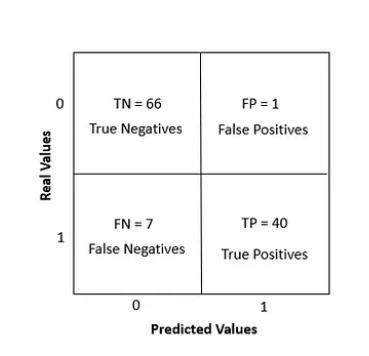
* True Positive (TP):
    The model predicted positive, and the real value is positive.
* True Negative (TN):
    The model predicted negative, and the real value is negative.
* False Positive (FP):
    The model predicted positive, but the real value is negative (Type I error).
*False Negative (FN):
    The model predicted negative, but the real value is positive (Type II error).

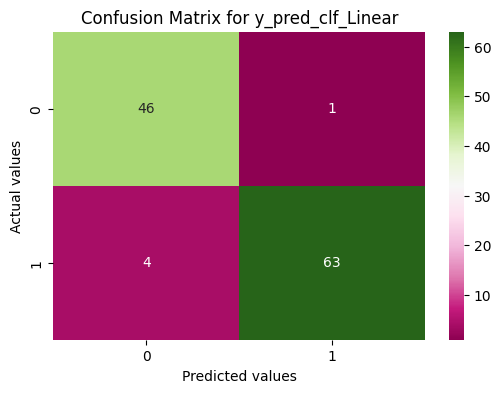

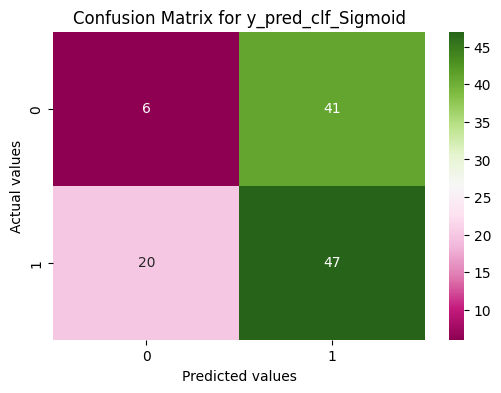

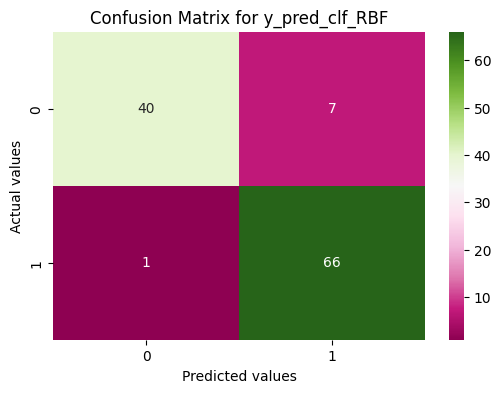

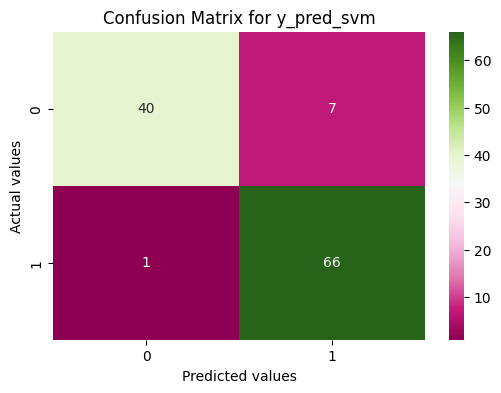

In [34]:
# EVALUATING THE MODEL

# CONFUSION MATRIX
# The confusion matrix is an N x N table (where N is the number of classes) that contains the number of correct and incorrect 
# predictions of the classification model.
y_pred = [y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]

# for i in range(0,4):
#     plt.figure(figsize=(6,4))
#     sns.heatmap(confusion_matrix(y_test, y_pred[i]), annot = True, cmap="PiYG")
#     plt.show()
    
y_pred = [y_pred_clf_Linear,y_pred_clf_Sigmoid,y_pred_clf_RBF,y_pred_svm]
models_name=[clf_Linear, clf_Sigmoid, clf_RBF, svm]

for i, y_pred in enumerate([y_pred_clf_Linear, y_pred_clf_Sigmoid, y_pred_clf_RBF, y_pred_svm]):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="PiYG")
    # Get the variable name dynamically
    var_name = [name for name, val in locals().items() if val is y_pred][0]
    plt.title(f'Confusion Matrix for {var_name}')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()
    # print sums of correct predictions, false positives and false negatives

In [35]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, y_pred_clf_Linear), 2)}") 
print(f"Precision: {round(precision_score(y_test, y_pred_clf_Linear), 2)}")
print(f"Recall: {round(recall_score(y_test, y_pred_clf_Linear), 2)}")
print(f"F1_score: {round(f1_score(y_test, y_pred_clf_Linear), 2)}")

Accuracy: 0.96
Precision: 0.98
Recall: 0.94
F1_score: 0.96


In [36]:
# CLASSIFICATION REPORT FOR LINEAR SUPPORT VECTOR MACHINE

print(classification_report(y_test, y_pred_clf_Linear))
# Support: number of observations for each class.
# Macro average: the arithmetic average of a metric between the two classes.
# Macro average(precision) = (p0 + p1)/2 = (0.90 + 0.98)/2 = 0.94 = 94%
# Weighted average: the weighted average is calculated by dividing sum(metric of interest x weight) by sum(weights).
# Here the weights are the number of observation for each class.
# Weighted average (precision)= (p0 x s0 + p1 x s1)/(s0 + s1) = (0.9 x 67) + (0.98 x 47)/(67 + 47) = 0.93 = 94%

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [37]:
print(classification_report(y_test, y_pred_clf_Linear))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [38]:
# Creating a function to compare different model by accuracy and recall

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred> 0.5, 1, 0)
    Accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    Recall = round(recall_score(y_test, y_pred), 2)
    Precision = round(precision_score(y_test, y_pred), 2)
    F1_score = round(f1_score(y_test, y_pred), 2)
    return pd.DataFrame([Accuracy, Recall, Precision, F1_score], index=['Accuracy', 'Recall', 'Precision','F1_score'], columns=[model_name])

In [39]:
# Applying the evaluation function to all the model with a for loop
models = [clf_Linear, clf_Sigmoid, clf_RBF, svm]
model_names = ['SVM(linear)', 'SVM(sigmoid)', 'SVM(RBF)', 'SVM(SVC)']

evaluation_results = []

for model_obj, model_name in zip(models, model_names):
    result = model_evaluation(model_obj, X_test, y_test, model_name)
    evaluation_results.append(result)

# Concatenate the evaluation results into a single DataFrame
Evaluation_df = pd.concat(evaluation_results, axis=1)
print(Evaluation_df)

           SVM(linear)  SVM(sigmoid)  SVM(RBF)  SVM(SVC)
Accuracy          0.96          0.46      0.93      0.93
Recall            0.94          0.70      0.99      0.99
Precision         0.98          0.53      0.90      0.90
F1_score          0.96          0.61      0.94      0.94


In [40]:
# Print the DataFrame as a nicely formatted table
from tabulate import tabulate

print(tabulate(Evaluation_df, headers='keys', tablefmt='fancy_grid'))

╒═══════════╤═══════════════╤════════════════╤════════════╤════════════╕
│           │   SVM(linear) │   SVM(sigmoid) │   SVM(RBF) │   SVM(SVC) │
╞═══════════╪═══════════════╪════════════════╪════════════╪════════════╡
│ Accuracy  │          0.96 │           0.46 │       0.93 │       0.93 │
├───────────┼───────────────┼────────────────┼────────────┼────────────┤
│ Recall    │          0.94 │           0.7  │       0.99 │       0.99 │
├───────────┼───────────────┼────────────────┼────────────┼────────────┤
│ Precision │          0.98 │           0.53 │       0.9  │       0.9  │
├───────────┼───────────────┼────────────────┼────────────┼────────────┤
│ F1_score  │          0.96 │           0.61 │       0.94 │       0.94 │
╘═══════════╧═══════════════╧════════════════╧════════════╧════════════╛


The metric we use to evaluate the model depends on two factors:<br/>

* CLASS BALANCE
* REASON FOR CLASSIFICATION

#### ACCURACY : It is normally used to evaluate a classifier but it works well when the classes are balanced and could become misleading when the classes are unbalanced.

#### USING RECALL WHEN TYPE 2 ERRORS ARE DANGEROUS<br/>
Typical example is the canceer diagnosis scenario. If we assume that only 5% of the cases are malignant we could have a classifier that predicts begnin for every sample, accuracy would be 95% but it would be ineffective.
The aim is to identify malignant case and we rather diagnose as malignant a benign case than the other way around.
False negative are very dangerous oin this case. Consequently RECALL is the best metric for evaluating the model's performance in this scenariom<br/>

#### USING PRECISION WHEN TYPE 1 ERROR ARE ACCEPTABLE<br/>
If we consider a different type of classification, for instance spam detection, we prefer to have type 1 error, false positive, meaning that it is better to receive a coupld of spam emails than missing important emails. In this scenario, precision emerges as most suitable metric for evaluating the model's performance.<br/>

https://medium.com/swlh/confusion-matrix-and-classification-report-88105288d48f

Accuracy:
The accuracy returns the proportion of correct predictions.

Accuracy = (TP + TN)/(TP + TN + FP + FN) = (66 + 40)/(66 + 40 + 1 + 7) = 0.93 = 93%

Precision:
The precision returns the proportion of true positives among all the values predicted as positive.

Precision = TP/(TP + FP) = 40/(40 + 1) = 0.98 = 98%

Recall:
The recall returns the proportion of positive values correctly predicted.

Recall = TP/(TP + FN) = 40/(40 + 7) = 0.85 = 85%

Specificity:
The specificity returns the proportion of negative values correctly predicted.

Specificity: TN/ (TN + FP) = 66/(66 + 1) = 0.99 = 99%

F1-score:
The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.

F1-score = (2 x Precision x Recall)/(Precision + Recall) = 0.91 = 91%

The harmonic mean gives more weight to the lower value, so a high F1-score means that both precision and recall are high.